In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
import sys, os 
import warnings
warnings.filterwarnings('ignore')

In [5]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_helper import FileHelper
from clean_data import Clean_data
import visualization as vs
from scale_norm import Scaler_Normalize
from outlier import Outlier 
file_helper = FileHelper()
clean_data = Clean_data()
scale_norm  = Scaler_Normalize()

missing_values = ["n/a", "na", "undefined"]

In [6]:
data = pd.read_csv("../data/data.csv")

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
struct_data = data.copy()
struct_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
x = struct_data
x['diagnosis'] = x['diagnosis'].apply(lambda x: 1 if x == "M" else 0)
x.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
feat = ['diagnosis', 'perimeter_worst', 'area_worst', 'radius_worst', 'concave points_worst', 'concave points_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'area_se', 'concavity_mean', 'concavity_worst', 'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean', 'texture_worst', 'concave points_se', 'smoothness_worst', 'texture_mean', 'symmetry_worst', 'concavity_se', 'smoothness_mean', 'symmetry_mean', 'compactness_se', 'fractal_dimension_worst', 'fractal_dimension_se', 'texture_se', 'fractal_dimension_mean', 'symmetry_se', 'smoothness_se']


In [14]:
x = data[feat[:29]]
x['diagnosis'] = x['diagnosis'].apply(lambda x: 1 if x == "M" else 0)
x.head(5)

,diagnosis,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,...,texture_mean,symmetry_worst,concavity_se,smoothness_mean,symmetry_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,texture_se,fractal_dimension_mean
0,1,184.60,2019.0,25.38,0.2654,0.14710,122.80,1001.0,17.99,153.40,...,10.38,0.4601,0.05373,0.11840,0.2419,0.04904,0.11890,0.006193,0.9053,0.07871
1,1,158.80,1956.0,24.99,0.1860,0.07017,132.90,1326.0,20.57,74.08,...,17.77,0.2750,0.01860,0.08474,0.1812,0.01308,0.08902,0.003532,0.7339,0.05667
2,1,152.50,1709.0,23.57,0.2430,0.12790,130.00,1203.0,19.69,94.03,...,21.25,0.3613,0.03832,0.10960,0.2069,0.04006,0.08758,0.004571,0.7869,0.05999
3,1,98.87,567.7,14.91,0.2575,0.10520,77.58,386.1,11.42,27.23,...,20.38,0.6638,0.05661,0.14250,0.2597,0.07458,0.17300,0.009208,1.1560,0.09744
4,1,152.20,1575.0,22.54,0.1625,0.10430,135.10,1297.0,20.29,94.44,...,14.34,0.2364,0.05688,0.10030,0.1809,0.02461,0.07678,0.005115,0.7813,0.05883


In [15]:
features = x.iloc[:, 1:]
features

,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,concavity_mean,...,texture_mean,symmetry_worst,concavity_se,smoothness_mean,symmetry_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,texture_se,fractal_dimension_mean
0,184.60,2019.0,25.380,0.2654,0.14710,122.80,1001.0,17.99,153.40,0.30010,...,10.38,0.4601,0.05373,0.11840,0.2419,0.04904,0.11890,0.006193,0.9053,0.07871
1,158.80,1956.0,24.990,0.1860,0.07017,132.90,1326.0,20.57,74.08,0.08690,...,17.77,0.2750,0.01860,0.08474,0.1812,0.01308,0.08902,0.003532,0.7339,0.05667
2,152.50,1709.0,23.570,0.2430,0.12790,130.00,1203.0,19.69,94.03,0.19740,...,21.25,0.3613,0.03832,0.10960,0.2069,0.04006,0.08758,0.004571,0.7869,0.05999
3,98.87,567.7,14.910,0.2575,0.10520,77.58,386.1,11.42,27.23,0.24140,...,20.38,0.6638,0.05661,0.14250,0.2597,0.07458,0.17300,0.009208,1.1560,0.09744
4,152.20,1575.0,22.540,0.1625,0.10430,135.10,1297.0,20.29,94.44,0.19800,...,14.34,0.2364,0.05688,0.10030,0.1809,0.02461,0.07678,0.005115,0.7813,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,166.10,2027.0,25.450,0.2216,0.13890,142.00,1479.0,21.56,158.70,0.24390,...,22.39,0.2060,0.05198,0.11100,0.1726,0.02891,0.07115,0.004239,1.2560,0.05623
565,155.00,1731.0,23.690,0.1628,0.09791,131.20,1261.0,20.13,99.04,0.14400,...,28.25,0.2572,0.03950,0.09780,0.1752,0.02423,0.06637,0.002498,2.4630,0.05533
566,126.70,1124.0,18.980,0.1418,0.05302,108.30,858.1,16.60,48.55,0.09251,...,28.08,0.2218,0.04730,0.08455,0.1590,0.03731,0.07820,0.003892,1.0750,0.05648
567,184.60,1821.0,25.740,0.2650,0.15200,140.10,1265.0,20.60,86.22,0.35140,...,29.33,0.4087,0.07117,0.11780,0.2397,0.06158,0.12400,0.006185,1.5950,0.07016


In [26]:
normal_data = scale_norm.scale_and_normalize(features, features.columns.to_list())
normal_data.insert(loc=0, column='diagnosis', value=x['diagnosis'])
normal_data.head(5)

,diagnosis,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,...,texture_mean,symmetry_worst,concavity_se,smoothness_mean,symmetry_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,texture_se,fractal_dimension_mean
0,1,0.241534,0.162886,0.224354,0.329615,0.264231,0.197325,0.131456,0.188308,0.098958,...,0.008189,0.216290,0.049037,0.214588,0.248058,0.126999,0.151381,0.066153,0.043539,0.218840
1,1,0.295233,0.238024,0.331922,0.349573,0.190740,0.336779,0.274326,0.351744,0.068725,...,0.149074,0.127753,0.025688,0.158539,0.207716,0.044477,0.121895,0.049829,0.045169,0.077291
2,1,0.225628,0.166194,0.246904,0.370566,0.282095,0.264370,0.199435,0.266922,0.072299,...,0.173184,0.179150,0.042942,0.228232,0.226141,0.126009,0.094714,0.056361,0.041848,0.093744
3,1,0.081340,0.031683,0.083687,0.298229,0.176219,0.078696,0.034682,0.070806,0.012859,...,0.121613,0.337028,0.048180,0.273437,0.261622,0.183078,0.260762,0.096796,0.059275,0.337028
4,1,0.263457,0.177514,0.270107,0.290207,0.269404,0.327919,0.254280,0.327351,0.085067,...,0.081372,0.081852,0.074647,0.223651,0.196591,0.087266,0.074106,0.075771,0.048365,0.097087


In [18]:
from causalnex.structure.notears import from_pandas


In [19]:
%%time
sm = from_pandas(normal_data.iloc[:, :9], tabu_parent_nodes=['diagnosis'],)

CPU times: total: 28 s
Wall time: 23.7 s


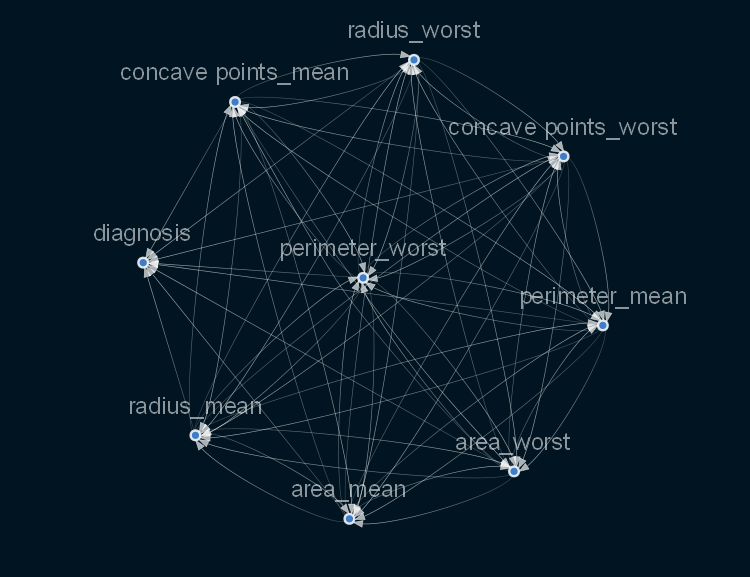

In [20]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

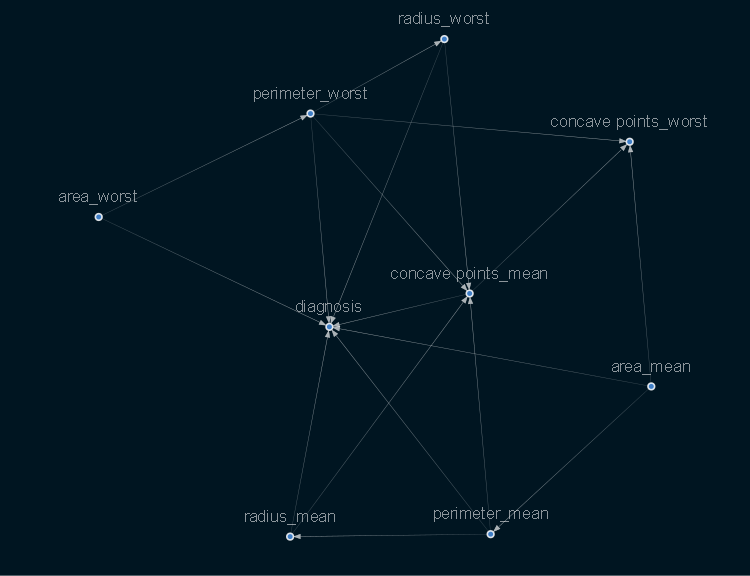

In [21]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## Stablity of causal graph

In [22]:
select_x = normal_data.iloc[:,:10]

To check the stablity of a causal graph, have to check the structure of the graphs by increasing or decreasing the the size of the data.The more the graph is stable the better it capture the causal relationship of a model.

Let’s now check the stablity of the graph by increasing the data, and comparing of each result using Jaccard Similarity Index.


## Jaccard similarity

In [27]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)), 3)

#### 50%

In [28]:
fiftyPart = int(select_x.shape[0]*0.5)
x_fiftyPart = select_x.head(fiftyPart)

CPU times: total: 30.6 s
Wall time: 19.5 s


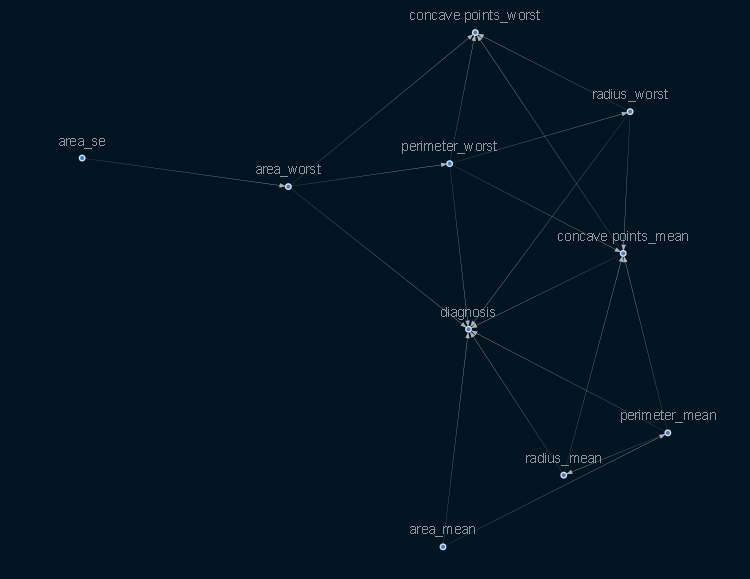

In [29]:

%%time
sm1 = from_pandas(x_fiftyPart, tabu_parent_nodes=['diagnosis'],)
sm1.remove_edges_below_threshold(0.8)
sm1 = sm1.get_largest_subgraph()
viz = plot_structure(
    sm1,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## 60%

In [30]:
sixtyPart = int(select_x.shape[0]*0.6)
x_sixtyPart = select_x.head(sixtyPart)

CPU times: total: 28.3 s
Wall time: 18.3 s


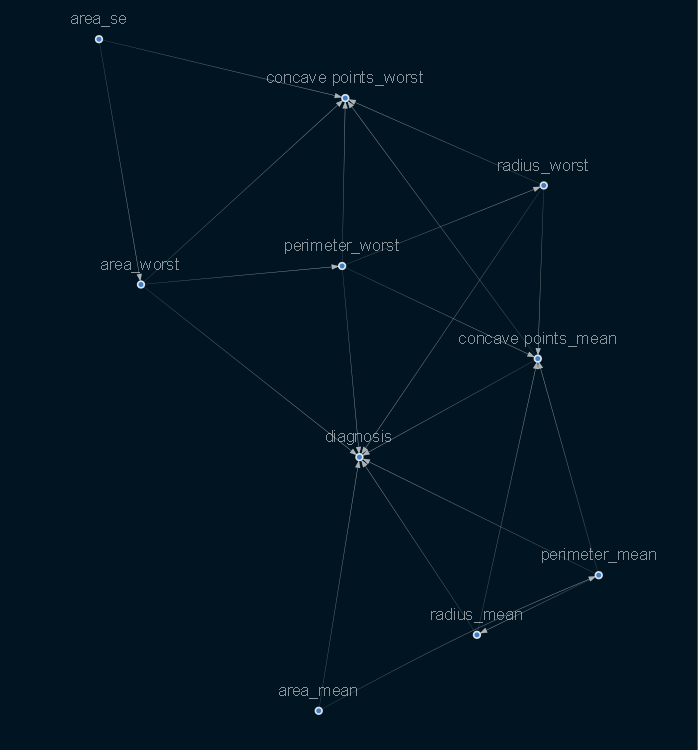

In [31]:
%%time
sm2 = from_pandas(x_sixtyPart, tabu_parent_nodes=['diagnosis'],)
sm2.remove_edges_below_threshold(0.8)
sm2 = sm2.get_largest_subgraph()

viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [32]:
jaccard_similarity(sm1.edges, sm2.edges)

0.952

## 70%

In [33]:
seventyPart = int(select_x.shape[0]*0.7)
x_seventyPart = select_x.head(seventyPart)

CPU times: total: 31.8 s
Wall time: 20.3 s


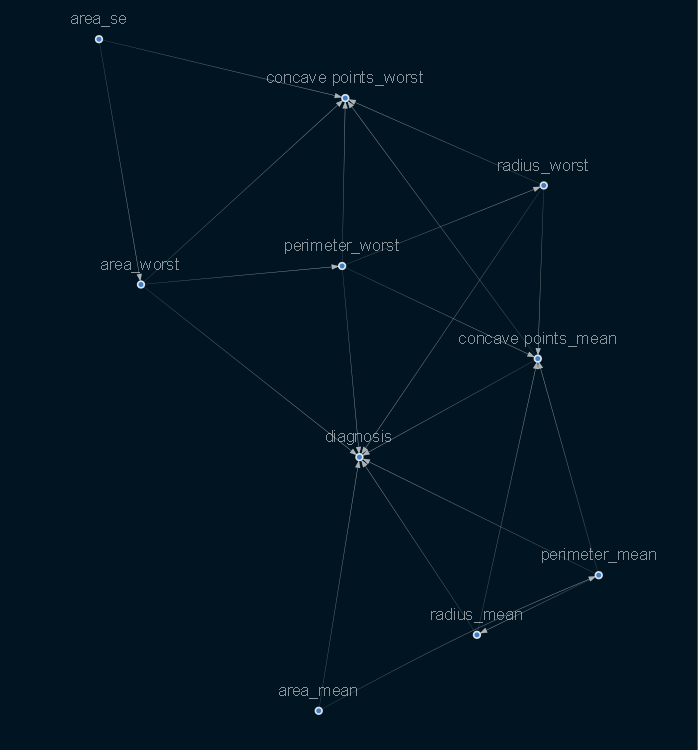

In [34]:
%%time
sm3 = from_pandas(x_seventyPart, tabu_parent_nodes=['diagnosis'],)
sm3.remove_edges_below_threshold(0.8)
sm3 = sm3.get_largest_subgraph()
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [35]:
jaccard_similarity(sm2.edges, sm3.edges)

0.783

## 80%

In [36]:
eighty_portion = int(select_x.shape[0] * .8)
x_eighty_portion = select_x.head(eighty_portion)

CPU times: total: 32.7 s
Wall time: 20.2 s


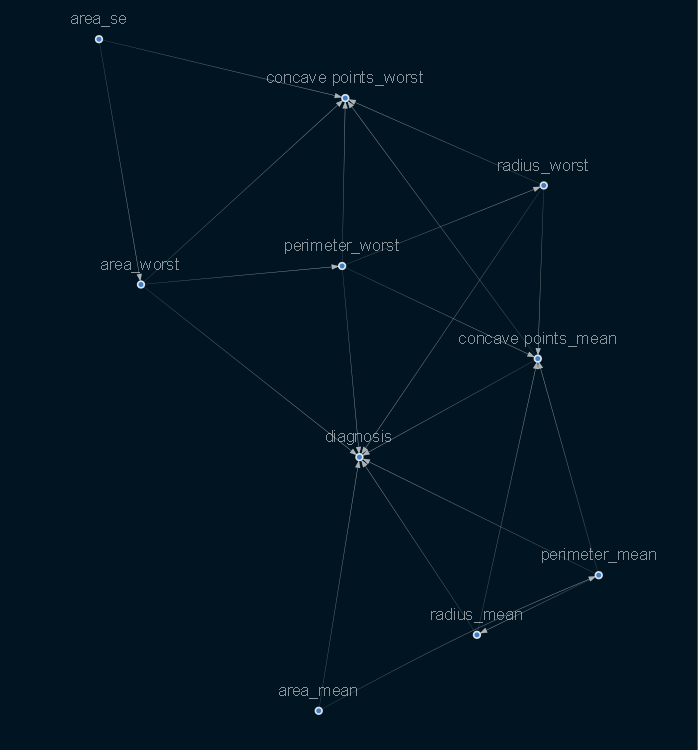

In [37]:
%%time
sm4 = from_pandas(x_eighty_portion, tabu_parent_nodes=['diagnosis'],)
sm4.remove_edges_below_threshold(0.8)
sm4 = sm4.get_largest_subgraph()
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [38]:
jaccard_similarity(sm3.edges, sm4.edges)

0.95

## 90%

In [39]:

ninety_portion = int(select_x.shape[0] * .9)
x_ninety_portion = select_x.head(ninety_portion)

CPU times: total: 34.8 s
Wall time: 21.9 s


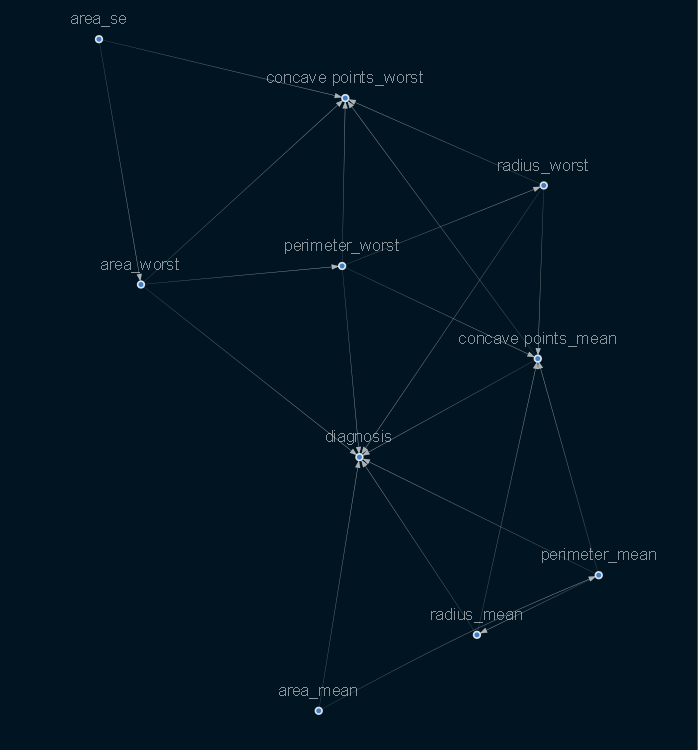

In [40]:
%%time
sm5 = from_pandas(x_ninety_portion, tabu_parent_nodes=['diagnosis'],)
sm5.remove_edges_below_threshold(0.8)
sm5 = sm5.get_largest_subgraph()
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [41]:
jaccard_similarity(sm5.edges, sm4.edges)

0.947

## 100%

CPU times: total: 30.9 s
Wall time: 18.9 s


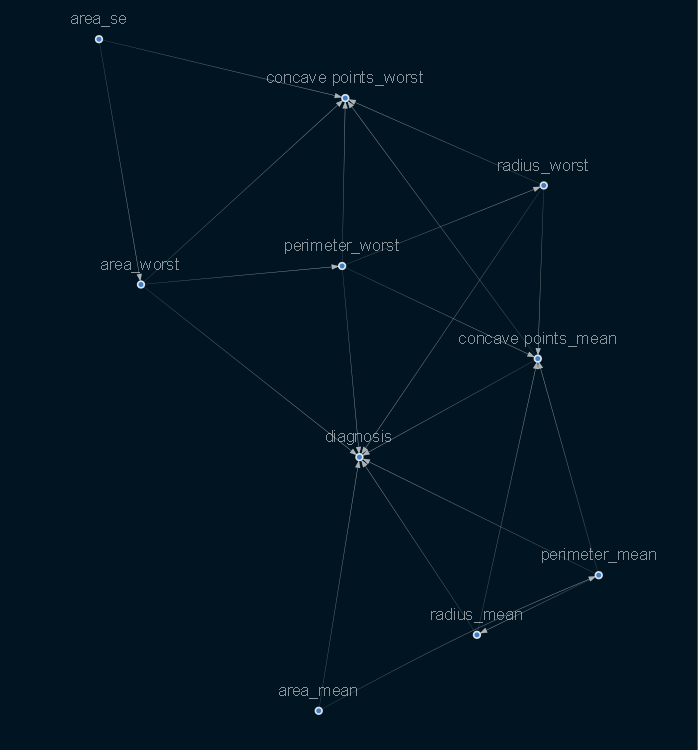

In [42]:
%%time
sm = from_pandas(select_x, tabu_parent_nodes=['diagnosis'],)
sm.remove_edges_below_threshold(0.8)
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size': 2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [43]:
jaccard_similarity(sm.edges, sm5.edges)

0.947

### Let's use the Markov Blanket to reduce the graph